# Notebook 01 — Data Cleaning
This notebook handles:
- Loading raw data
- Cleaning, encoding, and preprocessing
- Saving cleaned dataset to `data/processed/clean_data.csv`

# 1. Imports

In [2]:
# Standard library
import warnings
from pathlib import Path

# Data handling
import numpy as np
import pandas as pd
import pyreadstat

# Visualization
import matplotlib.pyplot as plt

# Feature engineering
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Display
from IPython.display import display, HTML

In [3]:
print("Current working directory:", Path.cwd())

Current working directory: c:\Users\gabri\Documents\Dokumenty\job-satisfaction-analysis\notebooks


# 2. Settings / Configuration

In [4]:
warnings.filterwarnings("ignore")
seed=42
display(HTML("<style>.output_scroll { height: auto !important; }</style>"))

# 3. Loading data

In [5]:
data_path = Path("../data") / "bkl21d.sav"

if data_path.exists():
    df_raw, meta = pyreadstat.read_sav(data_path)
else:
    print(f"Data file not found at {data_path}.")

In [6]:
df_raw.head(5)

,id,intid,waga_proba,waga_proba_kor,waga_pop,waga_pop_kor,rodzaj,edycja,rok,datawyw,...,pform4t,neet,neet2,form12m,pform12m1,pform12m2,pform12m,nform12m,dokszt_all,dokszt_all_bo
0,6590.0,03540-2021,0.374529,0.379380,3732.470588,3780.814881,1.0,2021.0,2021.0,2021-09-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,6591.0,02070-2021,0.865094,0.876299,8621.333333,8732.999924,1.0,2021.0,2021.0,2021-09-20,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,6592.0,01987-2021,0.283841,0.287518,2828.700000,2865.338333,1.0,2021.0,2021.0,2021-09-20,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,6593.0,01686-2021,1.380901,1.398787,13761.750000,13939.997104,1.0,2021.0,2021.0,2021-09-20,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,6594.0,04358-2021,0.897526,0.909151,8944.545455,9060.398404,1.0,2021.0,2021.0,2021-09-20,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
variables_info = pd.DataFrame({
    "Variable": meta.column_names,
    "Description": meta.column_labels
})

In [8]:
display(variables_info.head(20))

,Variable,Description
0,id,Unikalny identyfikator respondenta w bazie łąc...
1,intid,ID wywiadu
2,waga_proba,Waga próby bez korekty przypadków ekstremalnyc...
3,waga_proba_kor,Waga próby z korektą przypadków ekstremalnych ...
4,waga_pop,Waga populacyjna bez korekty przypadków ekstre...
5,waga_pop_kor,Waga populacyjna z korektą przypadków ekstrema...
6,rodzaj,Technika badania
7,edycja,Edycja badania
8,rok,BKL - rok badania
9,datawyw,Data wywiadu


# 4. Column selection and data dictionary

In [9]:
columns_to_use = [
    "id", "wiek", "m1", "woj", "m2", "g8", "wykszt_7k", "p8", "e17", "u8",
    "n11", "j1_02", "j1_03", "j1_04", "j1_05", "j1_06", "j1_07", "j1_08",
    "j1_09", "j1_10", "j3_01", "j3_02", "j3_03", "j3_04", "j3_05", "j3_06",
    "j3_07", "j3_08", "j3_09", "j3_10", "j3_11", "j3_12", "j3_13", "m9_13k",
    "m9d", "m13", "o1_1", "o1_2", "o1_3", "j1_01"
]

In [10]:
df_selected = df_raw[columns_to_use]

In [11]:
df_selected.head(5)

,id,wiek,m1,woj,m2,g8,wykszt_7k,p8,e17,u8,...,j3_11,j3_12,j3_13,m9_13k,m9d,m13,o1_1,o1_2,o1_3,j1_01
0,6590.0,59.0,1962.0,14.0,0.0,1.0,2.0,3.0,NaN,NaN,...,4.0,4.0,4.0,6.0,2500.0,3.0,5000.0,6000.0,-7.0,4.0
1,6591.0,19.0,2002.0,10.0,0.0,3.0,3.0,NaN,NaN,4.0,...,1.0,1.0,4.0,7.0,3000.0,5.0,2600.0,7500.0,14000.0,4.0
2,6592.0,37.0,1984.0,10.0,1.0,2.0,7.0,NaN,2.0,NaN,...,1.0,1.0,2.0,3.0,1100.0,4.0,2500.0,3000.0,4500.0,2.0
3,6593.0,25.0,1996.0,6.0,1.0,0.0,4.0,NaN,NaN,3.0,...,5.0,4.0,4.0,9.0,4000.0,2.0,5000.0,5000.0,10000.0,2.0
4,6594.0,24.0,1997.0,14.0,1.0,2.0,6.0,NaN,4.0,4.0,...,1.0,1.0,1.0,9.0,4800.0,5.0,6000.0,7500.0,10000.0,5.0


In [12]:
dictionary_df = pd.DataFrame({
    "Column": [c for c in meta.column_names if c in columns_to_use],
    "Description": [meta.column_labels[meta.column_names.index(c)] for c in meta.column_names if c in columns_to_use]
})

In [13]:
dictionary_df.head(10)

,Column,Description
0,id,Unikalny identyfikator respondenta w bazie łąc...
1,woj,Województwo (symbol terytorialny TERC)
2,m1,Rok urodzenia respondenta
3,wiek,Wiek
4,m2,Płeć respondenta
5,wykszt_7k,Wykształcenie ukończone (6 kat)
6,p8,"Na ile odpowiada praca, biorąc wszystko pod uw..."
7,e17,"Na ile odpowiada praca, biorąc wszystko pod uw..."
8,u8,"Na ile odpowiada praca, biorąc wszystko pod uw..."
9,n11,"Na ile odpowiada praca, biorąc wszystko pod uw..."


In [88]:
dictionary_df.to_csv("../data/metadata/data_dictionary.csv", index=False)

# 5. Data cleaning and feature engineering

Checking for wrong values

In [15]:
#to delete
print(df_selected['m9d'].describe())
print((df_selected['m9d'] < 0).sum())

count     1220.000000
mean      4004.907377
std       2722.681496
min          2.000000
25%       2500.000000
50%       3300.000000
75%       4500.000000
max      30000.000000
Name: m9d, dtype: float64
0


Creating 'satisfaction' column

In [16]:
df_selected.dtypes

id           float64
wiek         float64
m1           float64
woj          float64
m2           float64
g8           float64
wykszt_7k    float64
p8           float64
e17          float64
u8           float64
n11          float64
j1_02        float64
j1_03        float64
j1_04        float64
j1_05        float64
j1_06        float64
j1_07        float64
j1_08        float64
j1_09        float64
j1_10        float64
j3_01        float64
j3_02        float64
j3_03        float64
j3_04        float64
j3_05        float64
j3_06        float64
j3_07        float64
j3_08        float64
j3_09        float64
j3_10        float64
j3_11        float64
j3_12        float64
j3_13        float64
m9_13k       float64
m9d          float64
m13          float64
o1_1         float64
o1_2         float64
o1_3         float64
j1_01        float64
dtype: object

In [17]:
pd.set_option("display.max_colwidth", None)
print(variables_info[variables_info["Variable"].isin(df_selected)])

      Variable  \
0           id   
11         woj   
19          m1   
20        wiek   
25          m2   
35   wykszt_7k   
69          p8   
208        e17   
282         u8   
321        n11   
366         g8   
372      j1_01   
373      j1_02   
374      j1_03   
375      j1_04   
376      j1_05   
377      j1_06   
378      j1_07   
379      j1_08   
380      j1_09   
381      j1_10   
385      j3_01   
386      j3_02   
387      j3_03   
388      j3_04   
389      j3_05   
390      j3_06   
391      j3_07   
392      j3_08   
393      j3_09   
394      j3_10   
395      j3_11   
396      j3_12   
397      j3_13   
486       o1_1   
487       o1_2   
488       o1_3   
822        m9d   
824     m9_13k   
833        m13   

                                                                                 Description  
0                                        Unikalny identyfikator respondenta w bazie łączonej  
11                                                    Województwo (symb

Filter for relevant types of employment (g8)

In [18]:
df_selected["g8"].unique()

array([1., 3., 2., 0., 4., 5., 6.])

In [19]:
df_selected = df_selected[
    (df_selected['g8'] > 1) & (df_selected['g8'] < 5)
]

In [20]:
df_selected.head(5)

,id,wiek,m1,woj,m2,g8,wykszt_7k,p8,e17,u8,...,j3_11,j3_12,j3_13,m9_13k,m9d,m13,o1_1,o1_2,o1_3,j1_01
1,6591.0,19.0,2002.0,10.0,0.0,3.0,3.0,NaN,NaN,4.0,...,1.0,1.0,4.0,7.0,3000.0,5.0,2600.0,7500.0,14000.0,4.0
2,6592.0,37.0,1984.0,10.0,1.0,2.0,7.0,NaN,2.0,NaN,...,1.0,1.0,2.0,3.0,1100.0,4.0,2500.0,3000.0,4500.0,2.0
4,6594.0,24.0,1997.0,14.0,1.0,2.0,6.0,NaN,4.0,4.0,...,1.0,1.0,1.0,9.0,4800.0,5.0,6000.0,7500.0,10000.0,5.0
8,6598.0,49.0,1972.0,24.0,1.0,2.0,5.0,NaN,4.0,NaN,...,1.0,1.0,1.0,10.0,5000.0,4.0,3500.0,5500.0,6500.0,4.0
11,6601.0,46.0,1975.0,22.0,1.0,2.0,7.0,NaN,2.0,NaN,...,2.0,3.0,4.0,10.0,5000.0,NaN,-7.0,-7.0,-7.0,2.0


In [21]:
df_selected["g8"].unique()

array([3., 2., 4.])

Initialize satisfaction column

In [22]:
satisfaction_columns = ['p8','e17','u8','n11']
df_selected['satisfaction'] = np.nan

Assign satisfaction based on main employment type (g8)

In [23]:
g8_to_satisfaction_column = {1:'p8', 2:'e17', 3:'u8', 4:'n11'}

df_selected['satisfaction'] = df_selected.apply(
    lambda row: row[g8_to_satisfaction_column.get(row['g8'])] if row['g8'] in g8_to_satisfaction_column else None, axis=1
)

In [24]:
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 1 to 2527
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1235 non-null   float64
 1   wiek          1235 non-null   float64
 2   m1            1235 non-null   float64
 3   woj           1235 non-null   float64
 4   m2            1235 non-null   float64
 5   g8            1235 non-null   float64
 6   wykszt_7k     1233 non-null   float64
 7   p8            27 non-null     float64
 8   e17           1130 non-null   float64
 9   u8            148 non-null    float64
 10  n11           51 non-null     float64
 11  j1_02         1138 non-null   float64
 12  j1_03         1221 non-null   float64
 13  j1_04         1216 non-null   float64
 14  j1_05         1218 non-null   float64
 15  j1_06         1205 non-null   float64
 16  j1_07         1219 non-null   float64
 17  j1_08         1214 non-null   float64
 18  j1_09         1225 non-null   flo

Remove respondents who did not provide a satisfaction rating

In [25]:
df_selected = df_selected.dropna(subset=['satisfaction'])

Drop original satisfaction columns (p8, e17, u8, n11)

In [26]:
df_selected = df_selected.drop(columns=satisfaction_columns)

In [27]:
df_selected.head(5)

,id,wiek,m1,woj,m2,g8,wykszt_7k,j1_02,j1_03,j1_04,...,j3_12,j3_13,m9_13k,m9d,m13,o1_1,o1_2,o1_3,j1_01,satisfaction
1,6591.0,19.0,2002.0,10.0,0.0,3.0,3.0,4.0,5.0,5.0,...,1.0,4.0,7.0,3000.0,5.0,2600.0,7500.0,14000.0,4.0,4.0
2,6592.0,37.0,1984.0,10.0,1.0,2.0,7.0,2.0,3.0,4.0,...,1.0,2.0,3.0,1100.0,4.0,2500.0,3000.0,4500.0,2.0,2.0
4,6594.0,24.0,1997.0,14.0,1.0,2.0,6.0,5.0,5.0,5.0,...,1.0,1.0,9.0,4800.0,5.0,6000.0,7500.0,10000.0,5.0,4.0
8,6598.0,49.0,1972.0,24.0,1.0,2.0,5.0,3.0,5.0,5.0,...,1.0,1.0,10.0,5000.0,4.0,3500.0,5500.0,6500.0,4.0,4.0
11,6601.0,46.0,1975.0,22.0,1.0,2.0,7.0,3.0,5.0,5.0,...,3.0,4.0,10.0,5000.0,NaN,-7.0,-7.0,-7.0,2.0,2.0


Checking for missing values

In [28]:
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 1 to 2527
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1202 non-null   float64
 1   wiek          1202 non-null   float64
 2   m1            1202 non-null   float64
 3   woj           1202 non-null   float64
 4   m2            1202 non-null   float64
 5   g8            1202 non-null   float64
 6   wykszt_7k     1200 non-null   float64
 7   j1_02         1112 non-null   float64
 8   j1_03         1193 non-null   float64
 9   j1_04         1188 non-null   float64
 10  j1_05         1191 non-null   float64
 11  j1_06         1181 non-null   float64
 12  j1_07         1193 non-null   float64
 13  j1_08         1188 non-null   float64
 14  j1_09         1197 non-null   float64
 15  j1_10         1199 non-null   float64
 16  j3_01         1193 non-null   float64
 17  j3_02         1202 non-null   float64
 18  j3_03         1201 non-null   flo

In [29]:
missing_count = df_selected.isnull().sum()
missing_percentage = (missing_count / len(df_selected)) * 100

missing_report = pd.DataFrame({
    "variable": missing_count.index,
    "missing_count": missing_count.values,
    "missing_pct": missing_percentage.values
})

missing_report = missing_report[missing_report["missing_count"] > 0]
missing_report["description"] = missing_report["variable"].map(
    variables_info.set_index("Variable")["Description"]
)

missing_report = missing_report.sort_values("missing_pct", ascending=False)

print(missing_report)


     variable  missing_count  missing_pct  \
30        m9d            239    19.883527   
29     m9_13k            236    19.633943   
7       j1_02             90     7.487521   
31        m13             23     1.913478   
11      j1_06             21     1.747088   
13      j1_08             14     1.164725   
9       j1_04             14     1.164725   
21      j3_06             11     0.915141   
10      j1_05             11     0.915141   
8       j1_03              9     0.748752   
24      j3_09              9     0.748752   
16      j3_01              9     0.748752   
12      j1_07              9     0.748752   
22      j3_07              7     0.582363   
28      j3_13              7     0.582363   
20      j3_05              7     0.582363   
14      j1_09              5     0.415973   
25      j3_10              5     0.415973   
35      j1_01              5     0.415973   
23      j3_08              4     0.332779   
27      j3_12              3     0.249584   
15      j1

In [30]:
missing_cols = missing_report["variable"].tolist()  # reuse filtered list
missing_info = variables_info[variables_info["Variable"].isin(missing_cols)]

In [31]:
print(missing_info)

      Variable  \
35   wykszt_7k   
372      j1_01   
373      j1_02   
374      j1_03   
375      j1_04   
376      j1_05   
377      j1_06   
378      j1_07   
379      j1_08   
380      j1_09   
381      j1_10   
385      j3_01   
387      j3_03   
388      j3_04   
389      j3_05   
390      j3_06   
391      j3_07   
392      j3_08   
393      j3_09   
394      j3_10   
395      j3_11   
396      j3_12   
397      j3_13   
822        m9d   
824     m9_13k   
833        m13   

                                                                                 Description  
35                                                           Wykształcenie ukończone (6 kat)  
372                                                                     Zadowolenie: Zarobki  
373                                                           Zadowolenie: Możliwości awansu  
374                                                      Zadowolenie: Relacje z przełożonymi  
375                                   

Handling missing values

In [32]:
#Variable: wykszt_7k
#Original label (Polish): "Wykształcenie ukończone (6 kat)"
#Translated label (English): "Highest completed education (6 categories)"
df_selected["wykszt_7k"] = df_selected["wykszt_7k"].fillna(df_selected["wykszt_7k"].mode()[0])

In [33]:
#Variables j1_01 to j1_10: job satisfaction questions (1-5 scale)
#Topics include salary, promotion opportunities, relationships with supervisors, coworker interactions, job security, personal development, 
#work-life balance, initiative opportunities, work conditions, and overall job contentment.
j1_variables = [f"j1_{str(i).zfill(2)}" for i in range(1, 11)]  
print(j1_variables)  

['j1_01', 'j1_02', 'j1_03', 'j1_04', 'j1_05', 'j1_06', 'j1_07', 'j1_08', 'j1_09', 'j1_10']


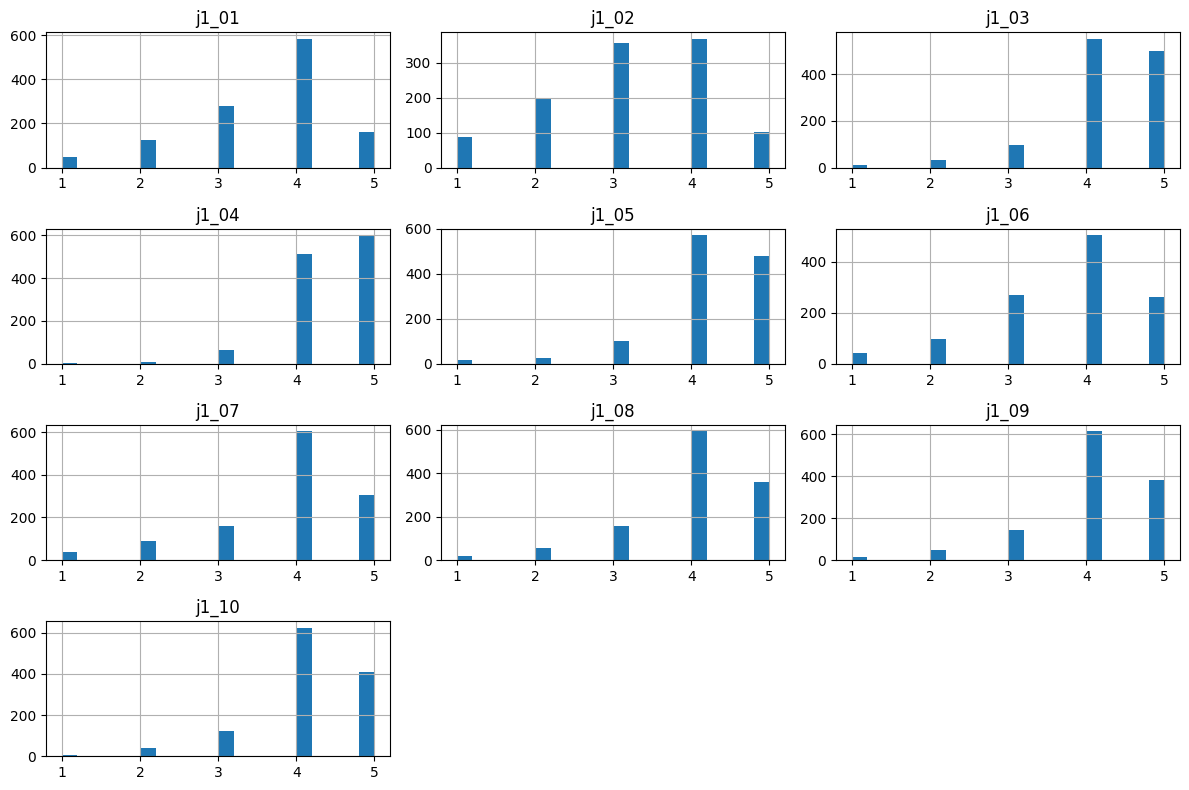

In [34]:
#Checking the skew of j1 variables
df_selected[j1_variables].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [35]:
df_selected[j1_variables].isna().sum()
df_selected[j1_variables].isna().corr()

,j1_01,j1_02,j1_03,j1_04,j1_05,j1_06,j1_07,j1_08,j1_09,j1_10
j1_01,1.000000,0.178066,0.444220,0.113460,0.129533,0.188700,0.144331,0.113460,0.196658,0.255828
j1_02,0.178066,1.000000,0.231967,0.145887,0.105441,0.348090,0.085295,0.204811,0.079840,0.112474
j1_03,0.444220,0.231967,1.000000,0.440310,0.194347,0.283056,0.440253,0.260415,0.294276,0.189072
j1_04,0.113460,0.145887,0.440310,1.000000,0.233855,0.222257,0.350363,0.277297,0.233936,0.149974
j1_05,0.129533,0.105441,0.194347,0.233855,1.000000,0.120552,0.295694,0.396713,0.401020,0.345389
j1_06,0.188700,0.348090,0.283056,0.222257,0.120552,1.000000,0.283056,0.340623,0.287359,0.247854
j1_07,0.144331,0.085295,0.440253,0.350363,0.295694,0.283056,1.000000,0.440310,0.594165,0.382488
j1_08,0.113460,0.204811,0.260415,0.277297,0.396713,0.340623,0.440310,1.000000,0.474888,0.460782
j1_09,0.196658,0.079840,0.294276,0.233936,0.401020,0.287359,0.594165,0.474888,1.000000,0.514889
j1_10,0.255828,0.112474,0.189072,0.149974,0.345389,0.247854,0.382488,0.460782,0.514889,1.000000


In [36]:
#Imputing missing values with median:
#Appropriate for ordinal Likert-scale variables (1-5) and robust to skew.
df_selected[j1_variables] = df_selected[j1_variables].fillna(df_selected[j1_variables].median())

In [37]:
#Variables j3_01 to j3_13: job-related statements (1-5 Likert scale)
#Respondents indicate agreement: 1 = strongly disagree, 5 = strongly agree
#Topics include work conditions, relationships, career development, and responsibilities
j3_variables = [f"j3_{str(i).zfill(2)}" for i in range(1, 14)]
print(j3_variables)

['j3_01', 'j3_02', 'j3_03', 'j3_04', 'j3_05', 'j3_06', 'j3_07', 'j3_08', 'j3_09', 'j3_10', 'j3_11', 'j3_12', 'j3_13']


<Axes: >

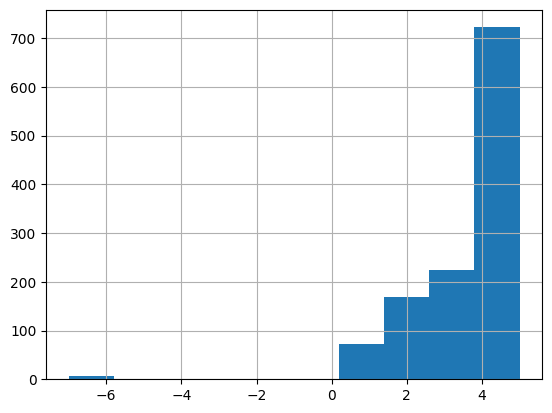

In [38]:
df_selected['j3_01'].hist()

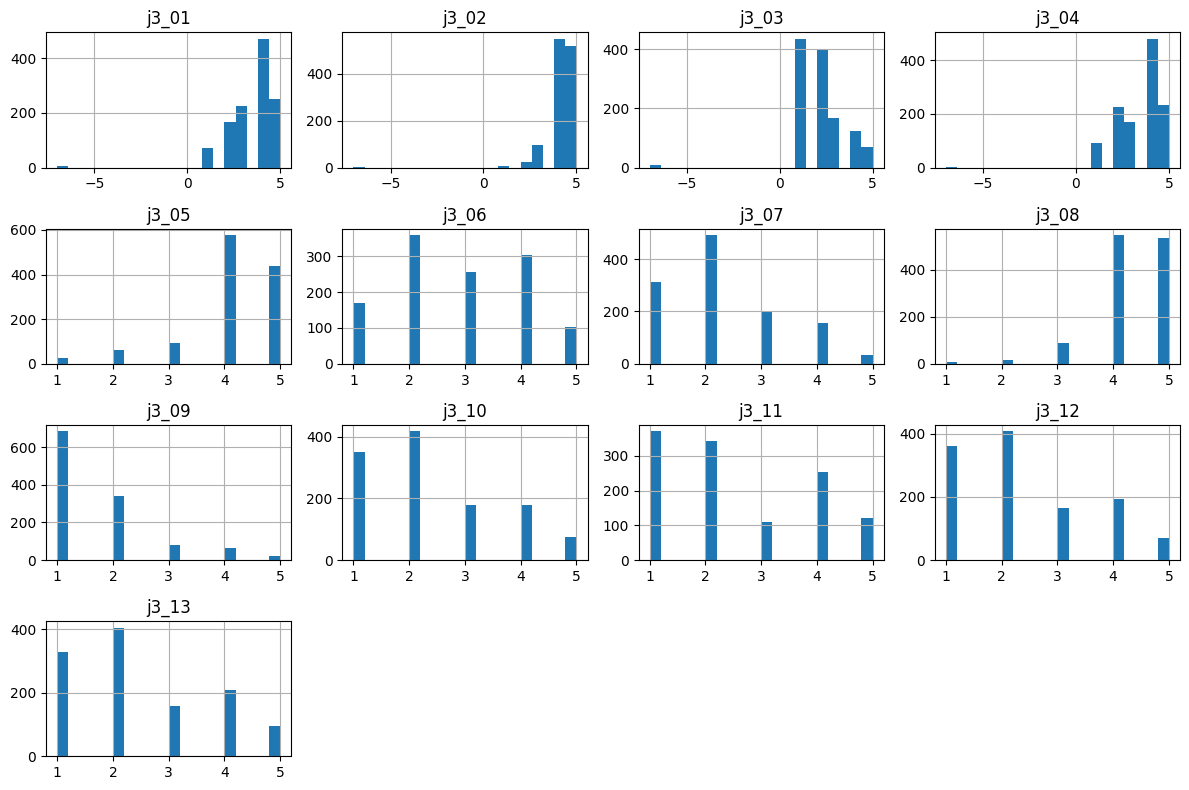

In [39]:
#Checking the skew of j3 variables
df_selected[j3_variables].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [40]:
is_integer_m13 = (df_selected['j1_01'] % 1 == 0).all()
print(f"Column 'm13' contains only integers: {is_integer_m13}")

Column 'm13' contains only integers: True


In [41]:
#Checking value labels for j3_01-j3_04
#Purpose: confirm meaning of special codes (e.g., -5) before deciding how to treat them
for col in ["j3_01", "j3_02", "j3_03", "j3_04", "m13"]:
    label_set = meta.variable_value_labels.get(col)
    if label_set:
        print(f"{col}:", label_set)
    else:
        print(f"{col}: no value labels found")

j3_01: {-8.0: 'trudno powiedzieć', -7.0: 'odmowa odpowiedzi', -3.0: 'brak danych', -1.0: 'NDT', 1.0: 'zdecydowanie nie', 2.0: 'raczej nie', 3.0: 'ani tak ani nie', 4.0: 'raczej tak', 5.0: 'zdecydowanie tak'}
j3_02: {-8.0: 'trudno powiedzieć', -7.0: 'odmowa odpowiedzi', -3.0: 'brak danych', -1.0: 'NDT', 1.0: 'zdecydowanie nie', 2.0: 'raczej nie', 3.0: 'ani tak ani nie', 4.0: 'raczej tak', 5.0: 'zdecydowanie tak'}
j3_03: {-8.0: 'trudno powiedzieć', -7.0: 'odmowa odpowiedzi', -3.0: 'brak danych', -1.0: 'NDT', 1.0: 'zdecydowanie nie', 2.0: 'raczej nie', 3.0: 'ani tak ani nie', 4.0: 'raczej tak', 5.0: 'zdecydowanie tak'}
j3_04: {-8.0: 'trudno powiedzieć', -7.0: 'odmowa odpowiedzi', -3.0: 'brak danych', -1.0: 'NDT', 1.0: 'zdecydowanie nie', 2.0: 'raczej nie', 3.0: 'ani tak ani nie', 4.0: 'raczej tak', 5.0: 'zdecydowanie tak'}
m13: {-8.0: 'trudno powiedzieć', -7.0: 'odmowa odpowiedzi', -3.0: 'brak danych', -1.0: 'NDT', 1.0: 'bardzo trudne', 2.0: 'trudne', 3.0: 'raczej trudne', 4.0: 'raczej ła

In [42]:
#Recode special negative codes (-8, -7, -3, -1) to NaN in j3_01-j3_04
special_codes = [-8, -7, -3, -1, 8]
for col in ["j3_01", "j3_02", "j3_03", "j3_04", "m13"]:
    df_selected[col] = df_selected[col].replace(special_codes, np.nan)

In [43]:
df_selected[j3_variables].isna().sum()
df_selected[j3_variables].isna().corr()

,j3_01,j3_02,j3_03,j3_04,j3_05,j3_06,j3_07,j3_08,j3_09,j3_10,j3_11,j3_12,j3_13
j3_01,1.000000,0.444970,0.251040,0.417394,0.385364,0.225300,0.188380,0.123634,0.077171,0.109174,0.179288,0.294772,0.188380
j3_02,0.444970,1.000000,0.575904,0.706222,0.653561,0.520488,0.434431,0.286628,0.189072,0.255828,0.407057,0.331665,0.215301
j3_03,0.251040,0.575904,1.000000,0.541597,0.500682,0.295694,0.373849,0.162554,0.104405,0.144331,0.233241,0.189072,0.120185
j3_04,0.417394,0.706222,0.541597,1.000000,0.770291,0.365098,0.460006,0.200884,0.130785,0.178836,0.286748,0.233045,0.304864
j3_05,0.385364,0.653561,0.500682,0.770291,1.000000,0.566747,0.568918,0.375280,0.120185,0.334811,0.533408,0.215301,0.425224
j3_06,0.225300,0.520488,0.295694,0.365098,0.566747,1.000000,0.566747,0.449555,0.093000,0.265276,0.424799,0.170291,0.222286
j3_07,0.188380,0.434431,0.373849,0.460006,0.568918,0.566747,1.000000,0.185429,0.120185,0.334811,0.265142,0.215301,0.425224
j3_08,0.123634,0.286628,0.162554,0.200884,0.375280,0.449555,0.185429,1.000000,0.330128,0.445160,0.706517,0.286628,0.185429
j3_09,0.077171,0.189072,0.104405,0.130785,0.120185,0.093000,0.120185,0.330128,1.000000,0.594165,0.233241,0.189072,0.120185
j3_10,0.109174,0.255828,0.144331,0.178836,0.334811,0.265276,0.334811,0.445160,0.594165,1.000000,0.314513,0.255828,0.334811


In [44]:
#Imputing missing values with median:
#Appropriate for ordinal Likert-scale variables (1-5) and robust to skew.
df_selected[j3_variables] = df_selected[j3_variables].fillna(df_selected[j3_variables].median())

In [45]:
#Checking the remaining variables with missing values
salary_vars = [
    'm9d',
    'm9_13k'
    ]

In [46]:
pd.set_option("display.max_colwidth", None)
print(variables_info[variables_info["Variable"].isin(salary_vars)])

    Variable  \
822      m9d   
824   m9_13k   

                                                                              Description  
822  Przeciętne miesięczne zarobki netto w ost. 12m - dokładne (uwzgl. dane przedziałowe)  
824     Przeciętne miesięczne zarobki netto w ost. 12m - przedział (uwzgl. dane dokładne)  


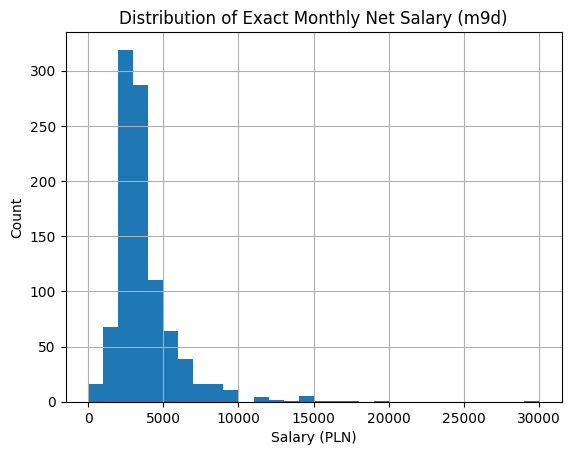

In [47]:
#Inspecting the distribution of monthly net salary (m9d)
df_selected['m9d'].hist(bins=30)
plt.title("Distribution of Exact Monthly Net Salary (m9d)")
plt.xlabel("Salary (PLN)")
plt.ylabel("Count")
plt.show()

In [48]:
#Checking the descriptive stats for salary
df_selected['m9d'].describe()

count      963.000000
mean      3917.322949
std       2348.428796
min          5.000000
25%       2600.000000
50%       3300.000000
75%       4500.000000
max      30000.000000
Name: m9d, dtype: float64

In [49]:
#Checking approximate bounds of the distribution
q_low = df_selected['m9d'].quantile(0.01)   
q_high = df_selected['m9d'].quantile(0.99)  
print(q_low, q_high)

555.8000000000001 14379.999999999996


In [50]:
#Removing all rows under minimum hourly rate for civil-law contracts (likely mis-coded entries)
#Retain high earners, since top values (30000pln) are plausible in general population
before = len(df_selected)
df_selected = df_selected[
    (df_selected['m9d'].isna()) | (df_selected['m9d'] >= 30.5)
]
after = len(df_selected)

print(f"Removed {before - after} rows with unrealistic salary values (<500 PLN).")

Removed 1 rows with unrealistic salary values (<500 PLN).


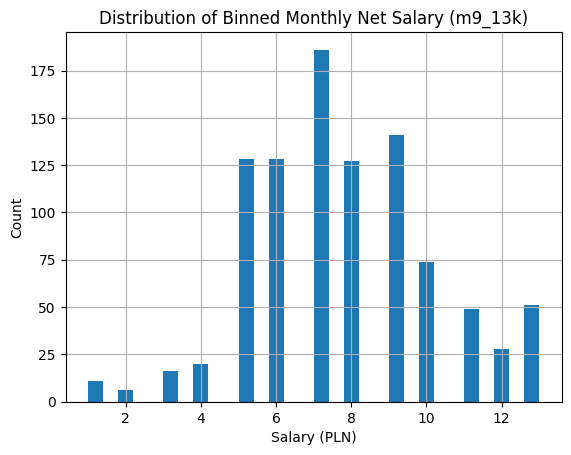

In [51]:
#Inspecting the distribution of monthly net salary (m9_13k)
df_selected['m9_13k'].hist(bins=30)
plt.title("Distribution of Binned Monthly Net Salary (m9_13k)")
plt.xlabel("Salary (PLN)")
plt.ylabel("Count")
plt.show()

In [52]:
df_selected['m9_13k'].isna().sum()

np.int64(236)

In [53]:
#overlap between two variables
missing_exact = df_selected['m9d'].isnull()
missing_binned = df_selected['m9_13k'].isnull()

#a count of missing values
total_missing_exact = missing_exact.sum()
total_missing_binned = missing_binned.sum()

In [54]:
overlap_mask = missing_exact & missing_binned
num_overlap = overlap_mask.sum()

In [55]:
print(num_overlap)
print(total_missing_binned)
print(total_missing_exact)

236
236
239


In [56]:
income_prediction_columns = [
    'wiek',
    'm2',
    'wykszt_7k',
    'j1_01',
    'j1_02',
    'j1_05',
    'j3_05',
    'satisfaction'
]

In [57]:
imputation_columns = ['m9d', 'm9_13k']

In [58]:
impute_df = df_selected[imputation_columns].copy() #temporary imputation dataframe

In [59]:
print(df_selected['m9d'].describe()) 
print((df_selected['m9d'] < 0).sum())

count      962.000000
mean      3921.389813
std       2346.255048
min         37.000000
25%       2600.000000
50%       3350.000000
75%       4500.000000
max      30000.000000
Name: m9d, dtype: float64
0


In [60]:
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=15,
    random_state=42,
    min_value=30.5, #minimum hourly wage in Poland
    max_value=None
)

In [61]:
df_imputed_temp = pd.DataFrame( #temporary imputation dataframe
    imputer.fit_transform(impute_df),  
    columns=impute_df.columns,
    index=impute_df.index
    )

In [62]:
df_selected['m9d'] = df_imputed_temp['m9d']
df_selected['m9_13k'] = df_imputed_temp['m9_13k']

In [63]:
print("Missing values after imputation:")
print(df_selected[['m9d', 'm9_13k']].isnull().sum())

Missing values after imputation:
m9d       0
m9_13k    0
dtype: int64


In [64]:
print(df_selected['m9d'].describe()) 
print((df_selected['m9d'] < 0).sum())

count     1201.000000
mean      7544.574925
std       7650.378375
min         30.500000
25%       2800.000000
50%       3750.000000
75%       7000.000000
max      30000.000000
Name: m9d, dtype: float64
0


In [65]:
m13_prediction_columns = [
    'm13',
    'm9d',     
    'j1_01',   
    'j1_05',   
    'j1_07',   
    'j3_05',    
    'satisfaction'
]

In [66]:
impute_df = df_selected[m13_prediction_columns].copy()

In [67]:
df_imputed_temp = pd.DataFrame(
    imputer.fit_transform(impute_df), 
    columns=impute_df.columns,
    index=impute_df.index
    )

In [68]:
df_selected['m13'] = df_imputed_temp['m13']

In [69]:
print("Missing values after imputation:")
print(df_selected[['m13']].isnull().sum())

Missing values after imputation:
m13    0
dtype: int64


Inverting negatively worded items

In [70]:
survey_labels = variables_info[variables_info["Variable"].isin(df_selected.columns)]
survey_labels

,Variable,Description
0,id,Unikalny identyfikator respondenta w bazie łączonej
11,woj,Województwo (symbol terytorialny TERC)
19,m1,Rok urodzenia respondenta
20,wiek,Wiek
25,m2,Płeć respondenta
35,wykszt_7k,Wykształcenie ukończone (6 kat)
366,g8,Główna praca
372,j1_01,Zadowolenie: Zarobki
373,j1_02,Zadowolenie: Możliwości awansu
374,j1_03,Zadowolenie: Relacje z przełożonymi


In [71]:
negative_items = ["j3_03", "j3_06", "j3_07", "j3_09", "j3_10", "j3_11", "j3_12", "j3_13"]

In [72]:
df_selected[negative_items].head()

,j3_03,j3_06,j3_07,j3_09,j3_10,j3_11,j3_12,j3_13
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0
2,4.0,3.0,2.0,2.0,4.0,1.0,1.0,2.0
4,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
8,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0
11,1.0,2.0,1.0,1.0,4.0,2.0,3.0,4.0


In [73]:
min_val = 1
max_val = 5

df_selected[negative_items] = df_selected[negative_items].apply(lambda x: (max_val + min_val) - x)

In [74]:
df_selected[negative_items].head()

,j3_03,j3_06,j3_07,j3_09,j3_10,j3_11,j3_12,j3_13
1,4.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0
2,2.0,3.0,4.0,4.0,2.0,5.0,5.0,4.0
4,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
8,5.0,3.0,4.0,5.0,4.0,5.0,5.0,5.0
11,5.0,4.0,5.0,5.0,2.0,4.0,3.0,2.0


**Feature engineering**

In [75]:
def assign_generation(year):
    if 1946 <= year <= 1964:
        return 'BB'
    elif 1965 <= year <= 1980:
        return 'X'
    elif 1981 <= year <= 1994:
        return 'M'
    elif 1995 <= year <= 2010:
        return 'Z'
    elif year >= 2011:
        return 'A'
    else:
        return np.nan 

In [76]:
df_selected['generation'] = df_selected['m1'].apply(assign_generation)

In [77]:
df_selected['generation'].isna().sum()

np.int64(0)

In [78]:
df_selected.isna().sum()

id              0
wiek            0
m1              0
woj             0
m2              0
g8              0
wykszt_7k       0
j1_02           0
j1_03           0
j1_04           0
j1_05           0
j1_06           0
j1_07           0
j1_08           0
j1_09           0
j1_10           0
j3_01           0
j3_02           0
j3_03           0
j3_04           0
j3_05           0
j3_06           0
j3_07           0
j3_08           0
j3_09           0
j3_10           0
j3_11           0
j3_12           0
j3_13           0
m9_13k          0
m9d             0
m13             0
o1_1            0
o1_2            0
o1_3            0
j1_01           0
satisfaction    0
generation      0
dtype: int64

**Data types**

In [79]:
is_integer_m13 = (df_selected['j1_01'] % 1 == 0).all()
print(f"Column 'm13' contains only integers: {is_integer_m13}")

Column 'm13' contains only integers: True


In [80]:
numeric_df = df_selected.select_dtypes(include="number")
integer_check = numeric_df.apply(lambda col: (col % 1 == 0).all())
print(integer_check)

id               True
wiek             True
m1               True
woj              True
m2               True
g8               True
wykszt_7k        True
j1_02            True
j1_03            True
j1_04            True
j1_05            True
j1_06            True
j1_07            True
j1_08            True
j1_09            True
j1_10            True
j3_01            True
j3_02            True
j3_03            True
j3_04            True
j3_05            True
j3_06            True
j3_07            True
j3_08            True
j3_09            True
j3_10            True
j3_11            True
j3_12            True
j3_13            True
m9_13k          False
m9d             False
m13             False
o1_1             True
o1_2             True
o1_3             True
j1_01            True
satisfaction     True
dtype: bool


In [81]:
integer_columns = integer_check[integer_check].index.tolist()
print("Columns containing only integers:", integer_columns)

Columns containing only integers: ['id', 'wiek', 'm1', 'woj', 'm2', 'g8', 'wykszt_7k', 'j1_02', 'j1_03', 'j1_04', 'j1_05', 'j1_06', 'j1_07', 'j1_08', 'j1_09', 'j1_10', 'j3_01', 'j3_02', 'j3_03', 'j3_04', 'j3_05', 'j3_06', 'j3_07', 'j3_08', 'j3_09', 'j3_10', 'j3_11', 'j3_12', 'j3_13', 'o1_1', 'o1_2', 'o1_3', 'j1_01', 'satisfaction']


In [82]:
df_selected[integer_columns] = df_selected[integer_columns].astype("int64")

In [83]:
df_selected.dtypes

id                int64
wiek              int64
m1                int64
woj               int64
m2                int64
g8                int64
wykszt_7k         int64
j1_02             int64
j1_03             int64
j1_04             int64
j1_05             int64
j1_06             int64
j1_07             int64
j1_08             int64
j1_09             int64
j1_10             int64
j3_01             int64
j3_02             int64
j3_03             int64
j3_04             int64
j3_05             int64
j3_06             int64
j3_07             int64
j3_08             int64
j3_09             int64
j3_10             int64
j3_11             int64
j3_12             int64
j3_13             int64
m9_13k          float64
m9d             float64
m13             float64
o1_1              int64
o1_2              int64
o1_3              int64
j1_01             int64
satisfaction      int64
generation       object
dtype: object

# 6. Exporting data

In [84]:
df_clean = df_selected.copy()

In [85]:
df_selected.to_csv("../data/processed/clean_data.csv", index=False)

In [87]:
variables_info.to_csv("../data/metadata/variables_info.csv", index=False)